In [1]:
# necessary imports as per use

import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

In [2]:
#purpose: this section will read all the .wav files present in the respective directory and store their address in the "wav_files" named list.

wav_files = [] #empty list 
list_of_animal = ['cat','dog','horse','duck'] #class of samples 

#accessing directory and storing name of files in list
for name in list_of_animal:
    wav_directory =  os.path.join('Data Train', name) 
    # Get a list of all .wav files in the directory
    for file in os.listdir(wav_directory):
        wav_files.append(wav_directory +'\\'+ file)

#print the wav_file to check names as been stored or not.
print(wav_files)

['Data Train\\cat\\cat1.wav', 'Data Train\\cat\\cat2.wav', 'Data Train\\dog\\dog-bark3.wav', 'Data Train\\dog\\dog1.wav', 'Data Train\\dog\\dog2.wav', 'Data Train\\dog\\dog_bark2.wav', 'Data Train\\horse\\horse1.wav', 'Data Train\\horse\\horse2.wav', 'Data Train\\duck\\duck1.wav', 'Data Train\\duck\\duck2.wav']


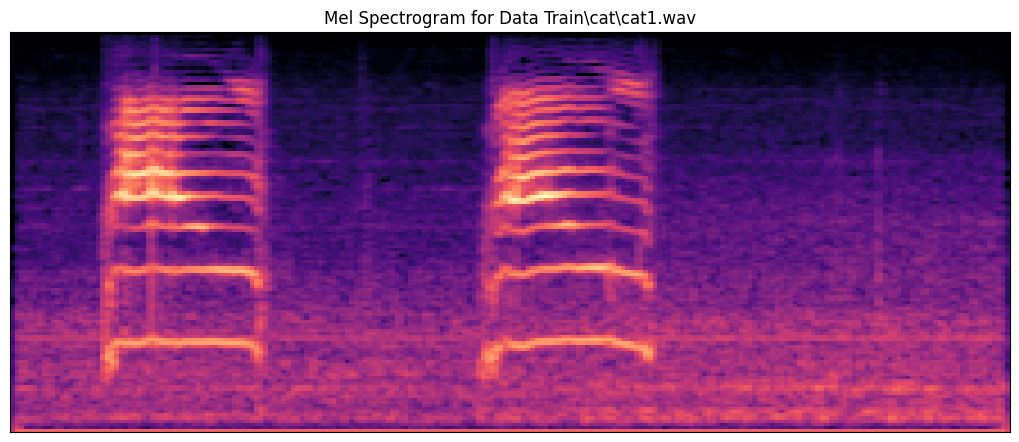

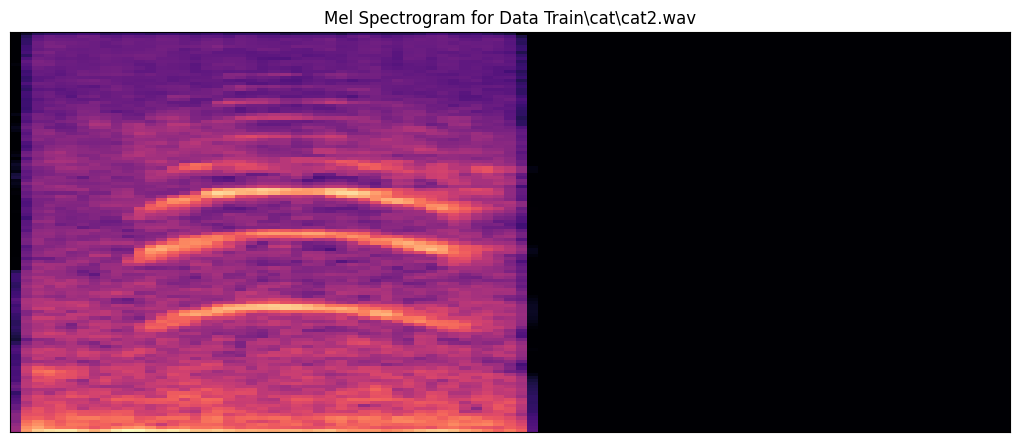

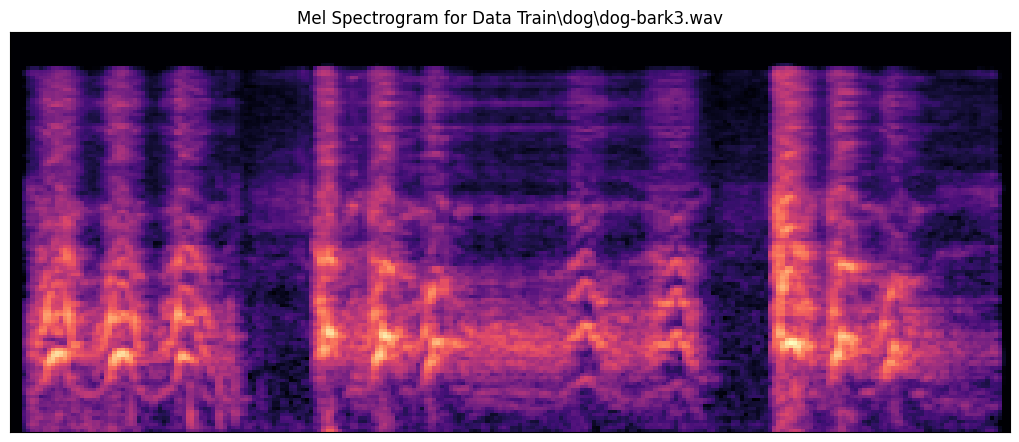

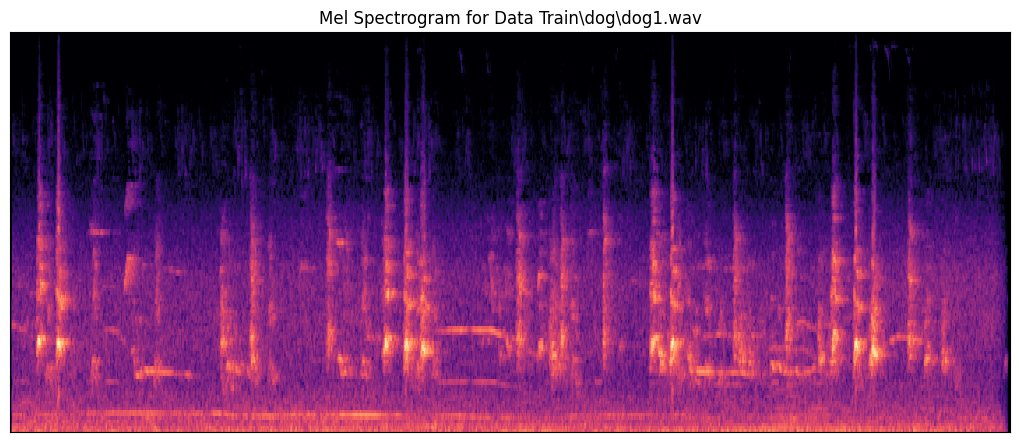

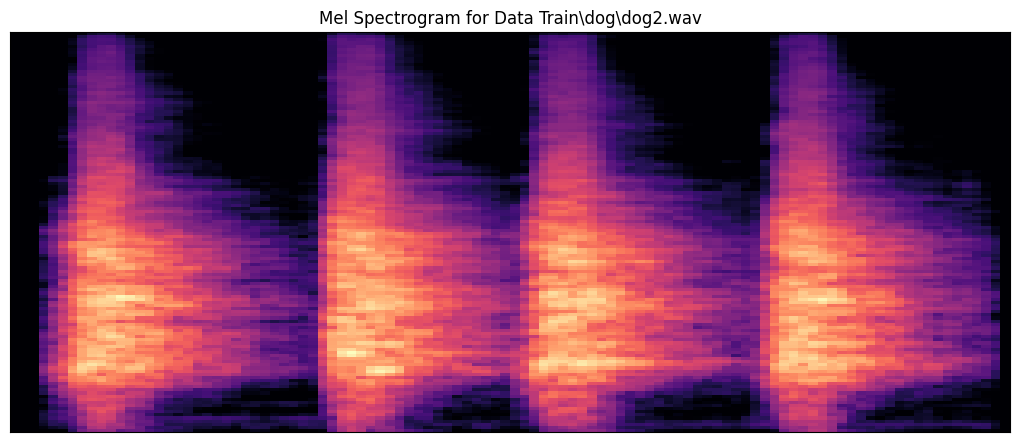

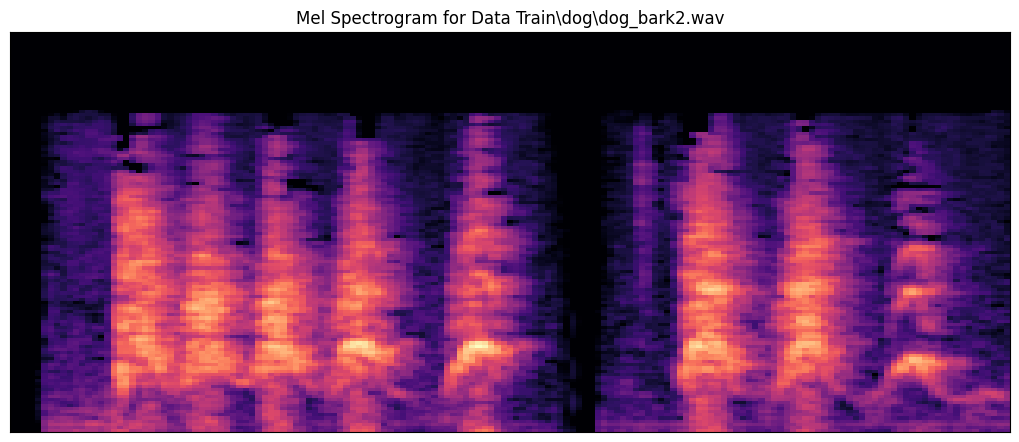

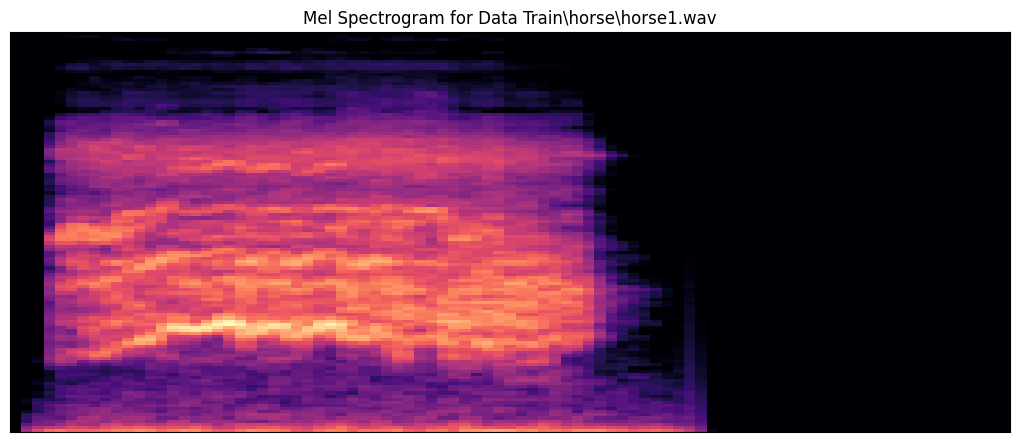

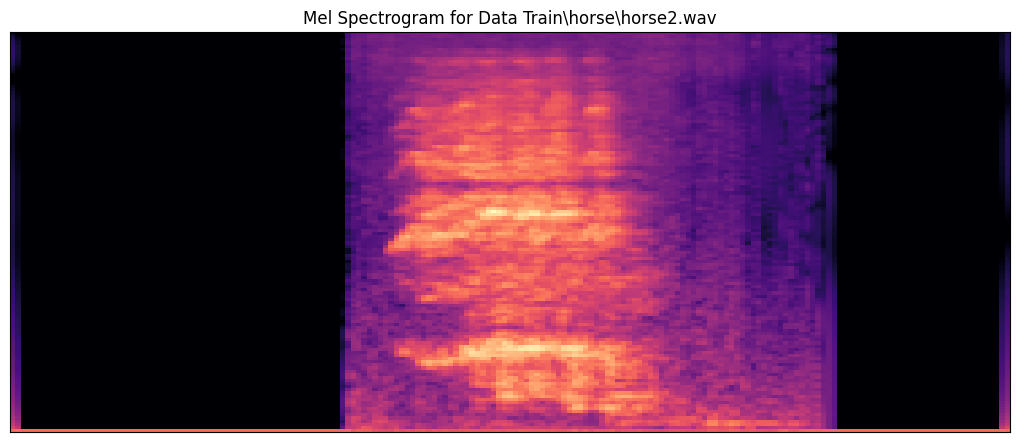

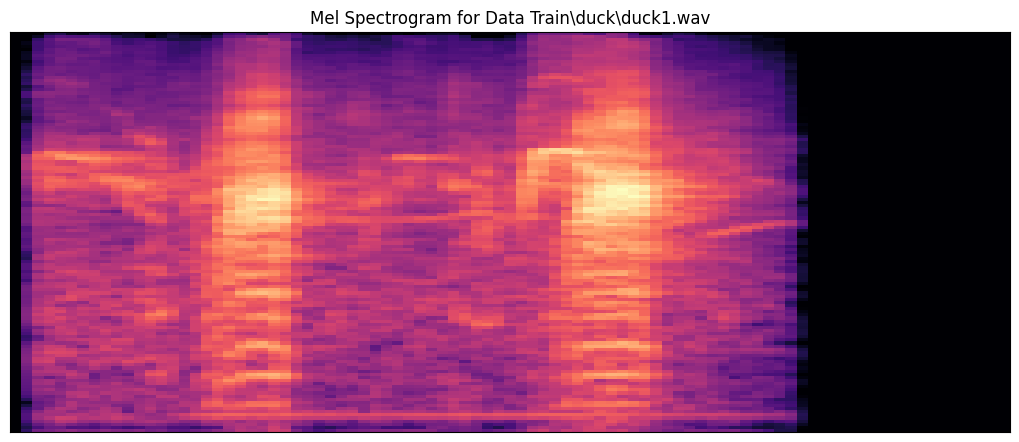

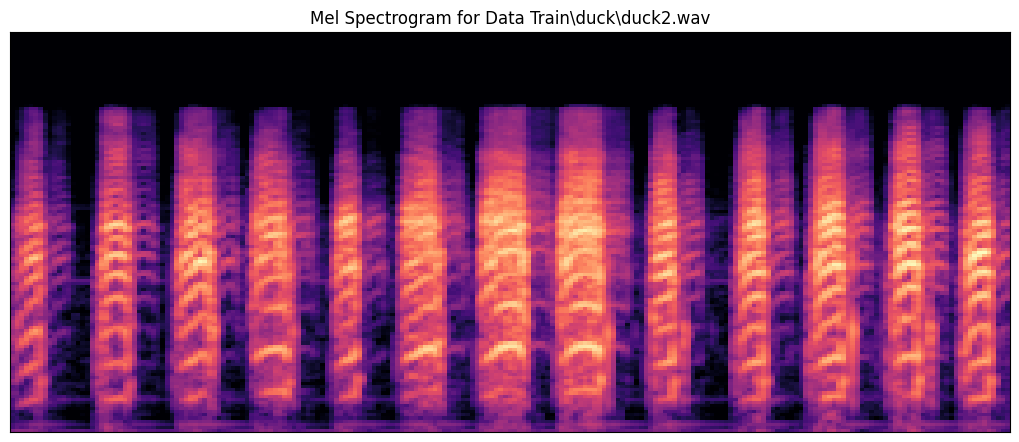

In [3]:
# purpose: this section will convert the .wav files into spectrogram and save them in a folder named "spectrogram" in the same place...
# ...where the "train set" directory has been downloaded.

for wav_file in wav_files:
    # Load the audio file
    y, sr = librosa.load(os.path.join(wav_file))
    # Compute the mel spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=32000, n_mels=128, fmax=16000) 
    # Convert to log scale (dB)
    log_mel_spectrogram = librosa.power_to_db(S, ref=np.max)

    # Display or save the mel spectrogram (you can choose either)
    plt.figure(figsize=(10, 4))
    plt.axes([0,0,1,1])
    librosa.display.specshow(log_mel_spectrogram) #, y_axis='mel', x_axis='time'
    # plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram for {wav_file}')
    # print(f'Spectogram{wav_file[10:-4]}')
    plt.savefig(f'spectrogram{wav_file[10:-4]}')  # Save as an image in spectrogram named folder (.png format)
    plt.show()  # Display the plot (optional)

# print(f"Converted {len(wav_files)} .wav files to mel spectrogram images.")

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) #validation_split=0.2
train_set = train_datagen.flow_from_directory('spectrogram',subset='training', target_size=(384, 384), class_mode='categorical', batch_size=22)
# test_set = train_datagen.flow_from_directory('spectrogram',subset='validation', target_size=(384, 384), class_mode='categorical', batch_size=22)

num_classes = len(train_set.class_indices) 
y_train = train_set.classes.tolist()
print(y_train)

Found 10 images belonging to 4 classes.
[0, 0, 1, 1, 1, 1, 2, 2, 3, 3]


In [5]:
#necessary imports as per use

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [6]:
# the model is made ramdomly without any calculation. just simple copy paste from yt.

model = Sequential()
model.add(Dense(3, activation='relu' ,input_shape=(384, 384, 3)))
model.add(Conv2D(128, kernel_size=[3,3], padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=[3,3], strides=2, padding='valid'))
model.add(Conv2D(64,  kernel_size=[3,3], padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=[3,3], strides=2, padding='valid'))
model.add(Conv2D(32,  kernel_size=[3,3], padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=[3,3], strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 384, 384, 3)       12        
                                                                 
 conv2d (Conv2D)             (None, 382, 382, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 190, 190, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 188, 188, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 93, 93, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 91, 91, 32)        1

In [8]:
history = model.fit(train_set, epochs=12, verbose=2) #validation_data = test_set

Epoch 1/12
1/1 - 4s - loss: 1.3879 - categorical_accuracy: 0.3000 - 4s/epoch - 4s/step
Epoch 2/12
1/1 - 3s - loss: 1.3025 - categorical_accuracy: 0.4000 - 3s/epoch - 3s/step
Epoch 3/12
1/1 - 2s - loss: 1.1632 - categorical_accuracy: 0.6000 - 2s/epoch - 2s/step
Epoch 4/12
1/1 - 3s - loss: 1.0222 - categorical_accuracy: 0.8000 - 3s/epoch - 3s/step
Epoch 5/12
1/1 - 3s - loss: 0.8143 - categorical_accuracy: 0.8000 - 3s/epoch - 3s/step
Epoch 6/12
1/1 - 4s - loss: 0.5096 - categorical_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 7/12
1/1 - 3s - loss: 0.2199 - categorical_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 8/12
1/1 - 3s - loss: 0.0721 - categorical_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 9/12
1/1 - 3s - loss: 0.0113 - categorical_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 10/12
1/1 - 3s - loss: 0.0017 - categorical_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 11/12
1/1 - 3s - loss: 3.3570e-04 - categorical_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 12/12
1/1 - 3s - loss: 6.5424e-

In [10]:
# necessary import as per use
import cv2
import matplotlib.pyplot as plt
import numpy as np

# using model to predict single image 
image = 'spectrogram/cat/cat2.png'

def prepare(image):
    img_size = 384
    img_array = cv2.imread(image, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (img_size, img_size))
    return new_array.reshape(-1, img_size, img_size, 3)

y = model.predict([prepare(image)])
# print(y)
list_of_animal[np.argmax(y)]

1/1 [==============================] - 0s 367ms/step


'cat'

1/1 [==============================] - 1s 693ms/step
[0, 1, 1, 2, 3, 1, 1, 2, 0, 3]


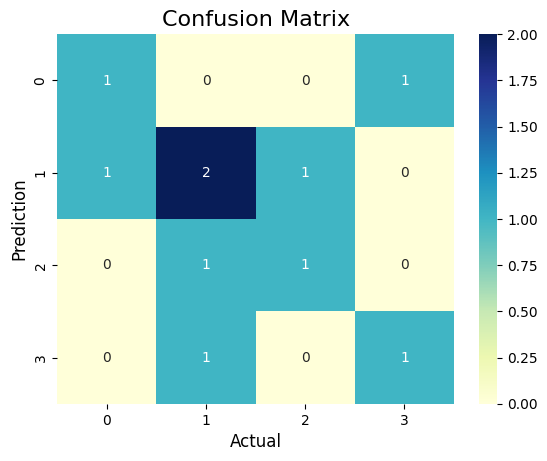

In [11]:
#necessary imports as per use
from sklearn.metrics import confusion_matrix
import seaborn as sns

# purpose: Confusion matrix. have to work on it.
predictions = model.predict(train_set)

save = []
num = 0
for i in predictions:
    save.append(np.argmax(i))
    num +=1
len(save)
print(save,sep='')

cm = confusion_matrix(save,y_train)

sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu')
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [ ]:
# this model is complete but the accuracy is very bad. 

#reason 1: dataset is scarce and inaccurate. have to find better dataset.
#reason 2: model value such as conv2d and maxpooling2d etc have to be checked and improved. have to study on it.

#Thank you - 
